In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

df=pd.read_csv("AB_NYC_2019.csv")
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df['neighbourhood_group'].unique().tolist()


['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [5]:
df['room_type'].unique().tolist()


['Private room', 'Entire home/apt', 'Shared room']

In [6]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [7]:
new_df=df.fillna(0)
new_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


In [9]:
AB_new_df=new_df[['id','host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','calculated_host_listings_count','price','reviews_per_month','number_of_reviews','availability_365','minimum_nights']]
AB_new_df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,calculated_host_listings_count,price,reviews_per_month,number_of_reviews,availability_365,minimum_nights
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,6,149,0.21,9,365,1
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,2,225,0.38,45,355,1
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,1,150,0.00,0,365,3
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,89,4.64,270,194,1
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,1,80,0.10,9,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,2,70,0.00,0,9,2
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,2,40,0.00,0,36,4
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,1,115,0.00,0,27,10
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,6,55,0.00,0,2,1


Text(0, 0.5, 'Density')

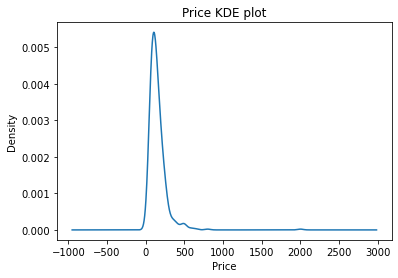

In [10]:
test=AB_new_df[['price']].head(500)
test.price.plot(kind= 'kde',title="Price KDE plot")
plt.xlabel("Price")
plt.ylabel("Density")

In [11]:
AB_new_df['price'].isnull().value_counts()


False    48895
Name: price, dtype: int64

In [12]:
AB_new_df['neighbourhood_group'].isnull().value_counts()


False    48895
Name: neighbourhood_group, dtype: int64

In [13]:
AB_new_df['neighbourhood'].isnull().value_counts()


False    48895
Name: neighbourhood, dtype: int64

In [14]:
AB_new_df['room_type'].isnull().value_counts()


False    48895
Name: room_type, dtype: int64

In [15]:
AB_new_df['availability_365'].isnull().value_counts()


False    48895
Name: availability_365, dtype: int64

In [16]:
AB_new_df['host_id'].isnull().value_counts()


False    48895
Name: host_id, dtype: int64

EDA

Finding Host with most availability


In [17]:
sns.set(rc={'figure.figsize':(12,10)})
sns.set_style('white')

In [18]:
x=AB_new_df['host_id'].head(15)
y=AB_new_df['availability_365'].head(15)


C:\Users\Vilas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Host with the most availability')

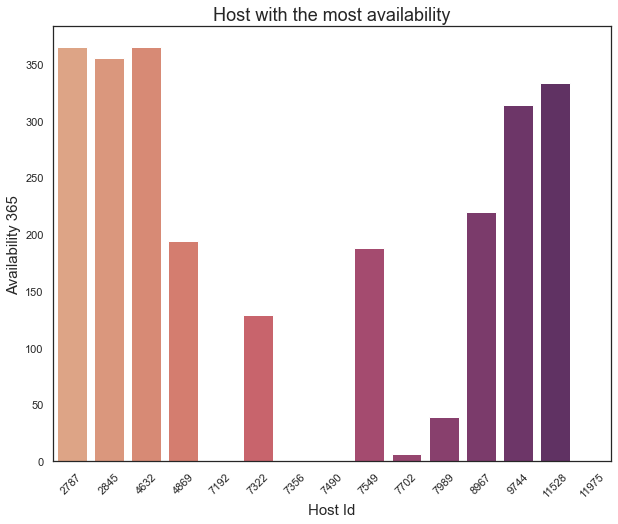

In [19]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
viz_1=sns.barplot(x,y,palette='flare')
plt.ylabel("Availability 365",fontsize=15)
plt.xlabel("Host Id",fontsize=15)
viz_1.set_xticklabels(viz_1.get_xticklabels(),rotation=45)
viz_1.set_title("Host with the most availability",fontsize=18)

Finding the Host with maximum Listings


In [21]:
top_host = AB_new_df['host_id'].value_counts()


In [22]:
top_host_dataFrame=pd.DataFrame(top_host)
top_host_dataFrame.reset_index(inplace=True)
top_host_dataFrame

,index,host_id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
...,...,...
37452,14041891,1
37453,3822369,1
37454,134961952,1
37455,2861854,1


In [23]:
top_host_dataFrame=top_host_dataFrame.rename(columns={'index' :'Host_Id', 'host_id' :'Count_of_Each_Host'})


In [24]:
x=top_host_dataFrame['Host_Id'].head(15)
y=top_host_dataFrame['Count_of_Each_Host'].head(15)


Text(0.5, 1.0, 'Host with Maximum Listing')

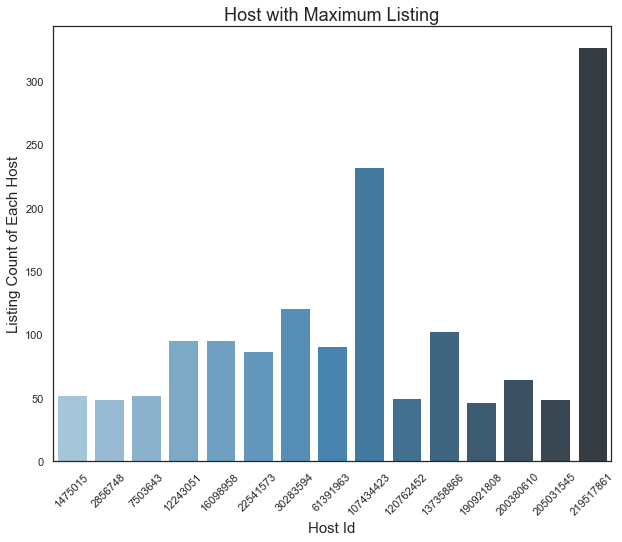

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
viz_2=sns.barplot(x,y,palette='Blues_d')
viz_2.set_xticklabels(viz_2.get_xticklabels(),rotation=45)
plt.xlabel("Host Id",fontsize=15)
plt.ylabel("Listing Count of Each Host",fontsize=15)
plt.title("Host with Maximum Listing",fontsize=18)


Finding the Most Expensive Neighbourhood Group


In [26]:
manhattan_p=np.where(AB_new_df['neighbourhood_group']=='Manhattan')
manhattan_price=AB_new_df.loc[manhattan_p]['price'].to_frame()


In [27]:
Brooklyn_p=np.where(AB_new_df['neighbourhood_group']=='Brooklyn')
Brooklyn_price=AB_new_df.loc[Brooklyn_p]['price'].to_frame()

In [28]:
Queens_p=np.where(AB_new_df['neighbourhood_group']=='Queens')
Queens_price=AB_new_df.loc[Queens_p]['price'].to_frame()


In [29]:
Staten_Is_p=np.where(AB_new_df['neighbourhood_group']=='Staten Island')
Staten_Is_price=AB_new_df.loc[Staten_Is_p]['price'].to_frame()


In [30]:
Bronx_p=np.where(AB_new_df['neighbourhood_group']=='Bronx')
Bronx_price=AB_new_df.loc[Bronx_p]['price'].to_frame()

In [31]:
price_list=[manhattan_price,Brooklyn_price,Queens_price,Staten_Is_price,Bronx_price]
neighbourhood_list=['Manhattan','Brooklyn','Queens','Staten Island','Bronx']


In [32]:
new_list=[]

#checking the stats for each of the neighbourhood group and appending it to the new list.

for x in price_list:
    i=x.describe()
    i=i.iloc[0:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    new_list.append(i)


In [33]:
#changing each column name to the corresponding neighbourhood name
new_list[0].rename(columns={'price':neighbourhood_list[0]},inplace=True)
new_list[1].rename(columns={'price':neighbourhood_list[1]},inplace=True)
new_list[2].rename(columns={'price':neighbourhood_list[2]},inplace=True)
new_list[3].rename(columns={'price':neighbourhood_list[3]},inplace=True)
new_list[4].rename(columns={'price':neighbourhood_list[4]},inplace=True)


In [34]:
stat_df=new_list
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Manhattan,Brooklyn,Queens,Staten Island,Bronx
Stats,,,,,
count,21661.000000,20104.000000,5666.000000,373.000000,1091.000000
mean,196.875814,124.383207,99.517649,114.812332,87.496792
std,291.383183,186.873538,167.102155,277.620403,106.709349
min,0.000000,0.000000,10.000000,13.000000,0.000000
25%,95.000000,60.000000,50.000000,50.000000,45.000000
50%,150.000000,90.000000,75.000000,75.000000,65.000000
75%,220.000000,150.000000,110.000000,110.000000,99.000000
max,10000.000000,10000.000000,10000.000000,5000.000000,2500.000000


Treating Outliers in our data set


The max value in the above table shows that there are some outliers in our data that needs to be treated


In [36]:
x=np.where(AB_new_df['price']<=650)
expensive_price=AB_new_df.loc[x]


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

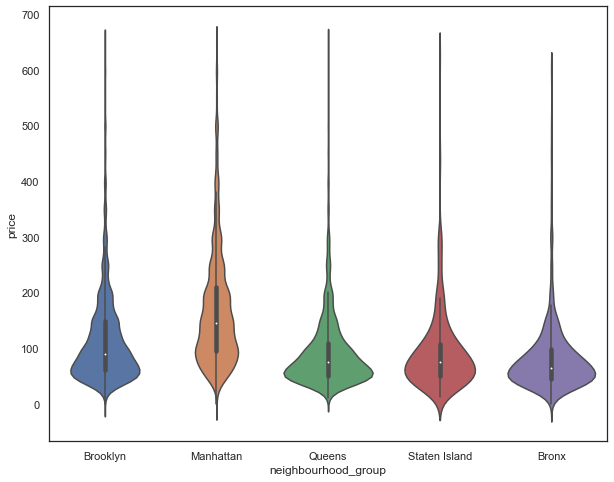

In [37]:
sns.violinplot(data=expensive_price, x='neighbourhood_group', y='price')


In [38]:
AB_new_df['neighbourhood'].value_counts().head(15)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Name: neighbourhood, dtype: int64

In [39]:
test=AB_new_df.loc[AB_new_df['neighbourhood'].isin(['Williamsburg','Bedfor-Stuyvesant','Harlem','Bushwick','Upper West Side',       
                                                    'Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown',
                                                    'East Harlem','Greenpoint','Chelsea','Lower East Side','Astoria'])]
test

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,calculated_host_listings_count,price,reviews_per_month,number_of_reviews,availability_365,minimum_nights
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,2,225,0.38,45,355,1
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,1,150,0.00,0,365,3
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,1,80,0.10,9,0,10
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,1,79,3.47,430,220,2
8,5203,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,1,79,0.99,118,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48888,36484087,274321313,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,1,125,0.00,0,31,4
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,2,40,0.00,0,36,4
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,1,115,0.00,0,27,10
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,6,55,0.00,0,2,1


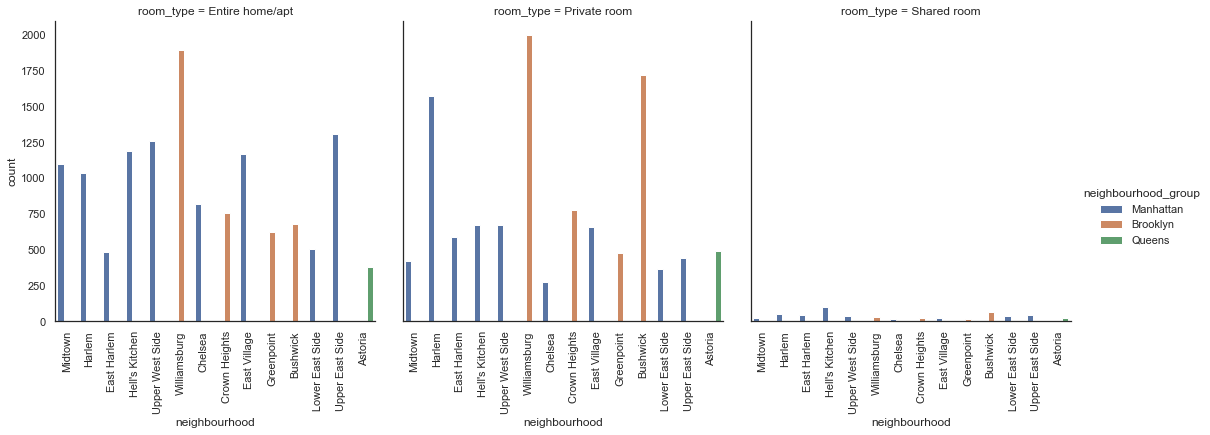

In [40]:
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=test, kind='count')
viz_3.set_xticklabels(rotation=90)

One hot encoding


In [41]:
AB_new_df=pd.get_dummies(AB_new_df,columns=['neighbourhood_group','room_type'])
AB_new_df

,id,host_id,neighbourhood,latitude,longitude,calculated_host_listings_count,price,reviews_per_month,number_of_reviews,availability_365,minimum_nights,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,2787,Kensington,40.64749,-73.97237,6,149,0.21,9,365,1,0,1,0,0,0,0,1,0
1,2595,2845,Midtown,40.75362,-73.98377,2,225,0.38,45,355,1,0,0,1,0,0,1,0,0
2,3647,4632,Harlem,40.80902,-73.94190,1,150,0.00,0,365,3,0,0,1,0,0,0,1,0
3,3831,4869,Clinton Hill,40.68514,-73.95976,1,89,4.64,270,194,1,0,1,0,0,0,1,0,0
4,5022,7192,East Harlem,40.79851,-73.94399,1,80,0.10,9,0,10,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Bedford-Stuyvesant,40.67853,-73.94995,2,70,0.00,0,9,2,0,1,0,0,0,0,1,0
48891,36485057,6570630,Bushwick,40.70184,-73.93317,2,40,0.00,0,36,4,0,1,0,0,0,0,1,0
48892,36485431,23492952,Harlem,40.81475,-73.94867,1,115,0.00,0,27,10,0,0,1,0,0,1,0,0
48893,36485609,30985759,Hell's Kitchen,40.75751,-73.99112,6,55,0.00,0,2,1,0,0,1,0,0,0,0,1


In [42]:
AB_new_df['neighbourhood']=pd.get_dummies(AB_new_df['neighbourhood'])


In [43]:
a=np.where(AB_new_df['neighbourhood_group_Manhattan']==1)
price_ohe_m=AB_new_df.loc[a]['price'].to_frame()
price_ohe_m=price_ohe_m.join(AB_new_df['neighbourhood_group_Manhattan']).head(30)
price_ohe_m=price_ohe_m.rename(columns={'price':'Manhattan_price'})


In [44]:
b=np.where(AB_new_df['neighbourhood_group_Queens']==1)
price_ohe_q=AB_new_df.loc[b]['price'].to_frame()
price_ohe_q=price_ohe_q.join(AB_new_df['neighbourhood_group_Queens']).head(30)
price_ohe_q=price_ohe_q.rename(columns={'price':'Queens_price'})


In [45]:
c=np.where(AB_new_df['neighbourhood_group_Bronx']==1)
price_ohe_bx=AB_new_df.loc[c]['price'].to_frame()
price_ohe_bx=price_ohe_bx.join(AB_new_df['neighbourhood_group_Bronx']).head(30)
price_ohe_bx=price_ohe_bx.rename(columns={'price':'Bronx_price'})


In [46]:
d=np.where(AB_new_df['neighbourhood_group_Brooklyn']==1)
price_ohe_br=AB_new_df.loc[d]['price'].to_frame()
price_ohe_br=price_ohe_br.join(AB_new_df['neighbourhood_group_Brooklyn']).head(30)
price_ohe_br=price_ohe_br.rename(columns={'price':'Brooklyn_price'})


In [47]:
e=np.where(AB_new_df['neighbourhood_group_Staten Island']==1)
price_ohe_si=AB_new_df.loc[e]['price'].to_frame()
price_ohe_si=price_ohe_si.join(AB_new_df['neighbourhood_group_Staten Island']).head(30)
price_ohe_si=price_ohe_si.rename(columns={'price':'Staten_Island_price'})


<AxesSubplot:xlabel='Staten_Island_price', ylabel='count'>

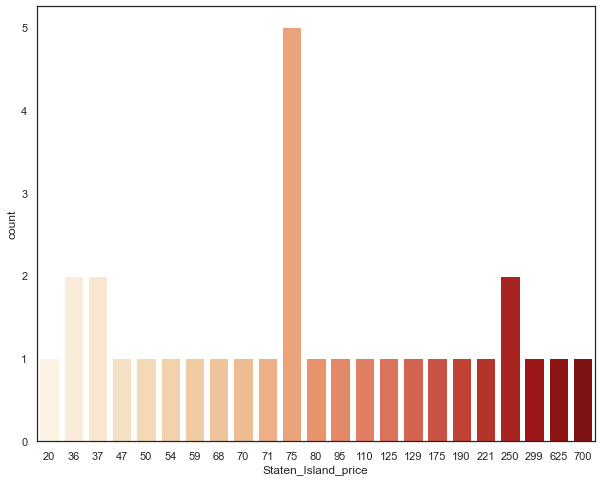

In [48]:
sns.countplot(x=price_ohe_si['Staten_Island_price'],data=price_ohe_si,palette="OrRd")


<AxesSubplot:xlabel='Manhattan_price', ylabel='count'>

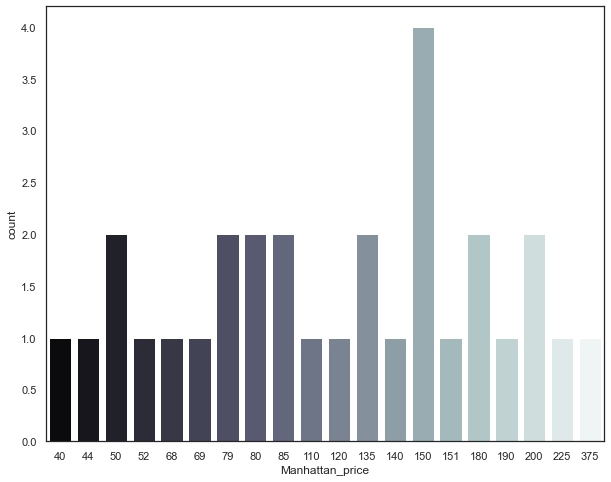

In [49]:
sns.countplot(x=price_ohe_m['Manhattan_price'],data=price_ohe_m,palette="bone")


<AxesSubplot:xlabel='Brooklyn_price', ylabel='count'>

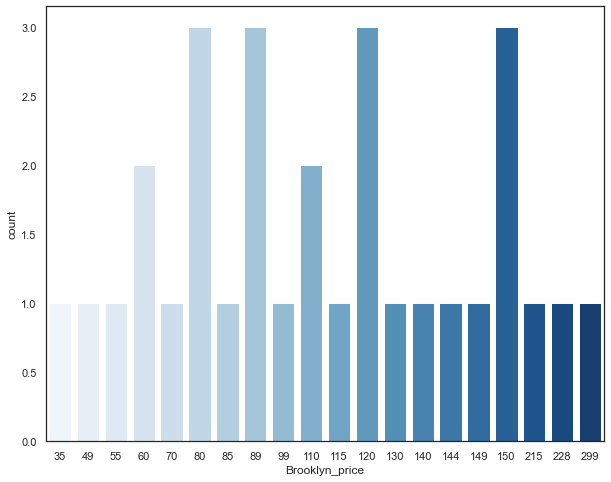

In [50]:
sns.countplot(x=price_ohe_br['Brooklyn_price'],data=price_ohe_br, palette="Blues")


<AxesSubplot:xlabel='Queens_price', ylabel='count'>

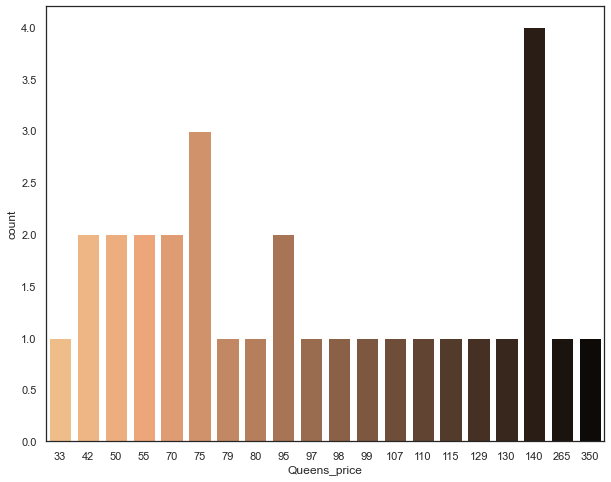

In [51]:
sns.countplot(x=price_ohe_q['Queens_price'],data=price_ohe_q,palette="copper_r")


<AxesSubplot:xlabel='Bronx_price', ylabel='count'>

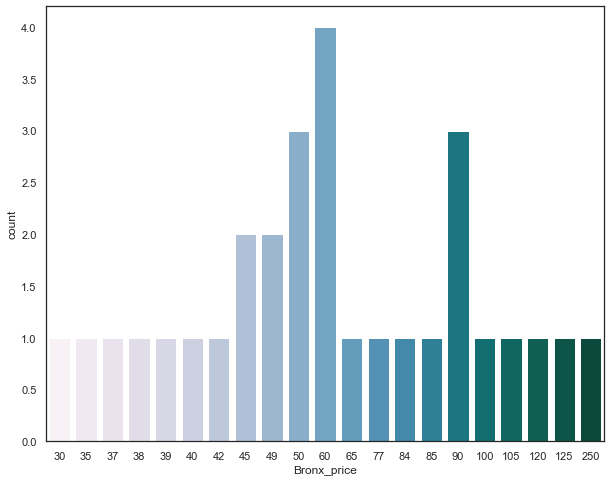

In [52]:
sns.countplot(x=price_ohe_bx['Bronx_price'],data=price_ohe_bx,palette="PuBuGn")


In [53]:
AB_new_df


,id,host_id,neighbourhood,latitude,longitude,calculated_host_listings_count,price,reviews_per_month,number_of_reviews,availability_365,minimum_nights,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,2787,0,40.64749,-73.97237,6,149,0.21,9,365,1,0,1,0,0,0,0,1,0
1,2595,2845,0,40.75362,-73.98377,2,225,0.38,45,355,1,0,0,1,0,0,1,0,0
2,3647,4632,0,40.80902,-73.94190,1,150,0.00,0,365,3,0,0,1,0,0,0,1,0
3,3831,4869,0,40.68514,-73.95976,1,89,4.64,270,194,1,0,1,0,0,0,1,0,0
4,5022,7192,0,40.79851,-73.94399,1,80,0.10,9,0,10,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,0,40.67853,-73.94995,2,70,0.00,0,9,2,0,1,0,0,0,0,1,0
48891,36485057,6570630,0,40.70184,-73.93317,2,40,0.00,0,36,4,0,1,0,0,0,0,1,0
48892,36485431,23492952,0,40.81475,-73.94867,1,115,0.00,0,27,10,0,0,1,0,0,1,0,0
48893,36485609,30985759,0,40.75751,-73.99112,6,55,0.00,0,2,1,0,0,1,0,0,0,0,1


In [54]:
from scipy.stats import pearsonr


<AxesSubplot:>

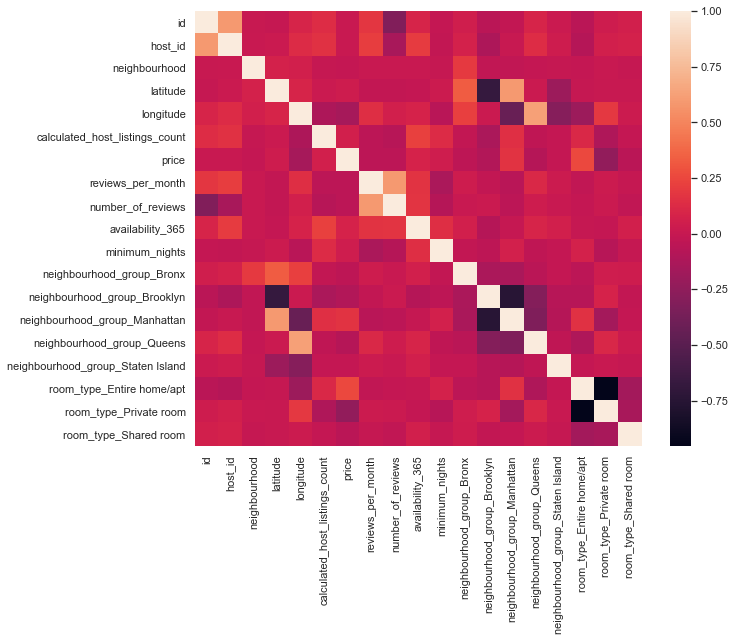

In [55]:
corr=AB_new_df.corr(method='pearson')
sns.heatmap(corr)

In [56]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = AB_new_df.columns[columns]
AB_new_df= AB_new_df[selected_columns]
#data

Modelling


In [57]:
X=AB_new_df
Y=AB_new_df['price']


In [58]:
train_data=X
test_data=Y.values.reshape(-1,1)


In [59]:
from sklearn.model_selection import train_test_split


In [60]:
from sklearn.linear_model import LinearRegression


In [61]:
X_train, X_test, y_train, y_test = train_test_split(train_data,test_data,train_size=0.70,test_size=0.30,random_state=43)


In [62]:
model=LinearRegression()


In [63]:
model.fit(X_train,y_train)


LinearRegression()

In [64]:
y_hat=model.predict(X_test)


In [65]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_hat))
print(r2_score(y_test,y_hat))
print("RMSE: %f" % (rmse))


1.0
RMSE: 0.000000


In [66]:
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))


Mean squared error: 0.00


In [67]:
print('Variance score: %.2f' % model.score(X_test, y_test))


Variance score: 1.00


Implementing XGBoost


In [71]:

import xgboost as xgb



In [72]:
AB_new_df


,id,host_id,neighbourhood,latitude,longitude,calculated_host_listings_count,price,reviews_per_month,number_of_reviews,availability_365,minimum_nights,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,2787,0,40.64749,-73.97237,6,149,0.21,9,365,1,0,1,0,0,0,0,1,0
1,2595,2845,0,40.75362,-73.98377,2,225,0.38,45,355,1,0,0,1,0,0,1,0,0
2,3647,4632,0,40.80902,-73.94190,1,150,0.00,0,365,3,0,0,1,0,0,0,1,0
3,3831,4869,0,40.68514,-73.95976,1,89,4.64,270,194,1,0,1,0,0,0,1,0,0
4,5022,7192,0,40.79851,-73.94399,1,80,0.10,9,0,10,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,0,40.67853,-73.94995,2,70,0.00,0,9,2,0,1,0,0,0,0,1,0
48891,36485057,6570630,0,40.70184,-73.93317,2,40,0.00,0,36,4,0,1,0,0,0,0,1,0
48892,36485431,23492952,0,40.81475,-73.94867,1,115,0.00,0,27,10,0,0,1,0,0,1,0,0
48893,36485609,30985759,0,40.75751,-73.99112,6,55,0.00,0,2,1,0,0,1,0,0,0,0,1


In [73]:
train_data


,id,host_id,neighbourhood,latitude,longitude,calculated_host_listings_count,price,reviews_per_month,number_of_reviews,availability_365,minimum_nights,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,2787,0,40.64749,-73.97237,6,149,0.21,9,365,1,0,1,0,0,0,0,1,0
1,2595,2845,0,40.75362,-73.98377,2,225,0.38,45,355,1,0,0,1,0,0,1,0,0
2,3647,4632,0,40.80902,-73.94190,1,150,0.00,0,365,3,0,0,1,0,0,0,1,0
3,3831,4869,0,40.68514,-73.95976,1,89,4.64,270,194,1,0,1,0,0,0,1,0,0
4,5022,7192,0,40.79851,-73.94399,1,80,0.10,9,0,10,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,0,40.67853,-73.94995,2,70,0.00,0,9,2,0,1,0,0,0,0,1,0
48891,36485057,6570630,0,40.70184,-73.93317,2,40,0.00,0,36,4,0,1,0,0,0,0,1,0
48892,36485431,23492952,0,40.81475,-73.94867,1,115,0.00,0,27,10,0,0,1,0,0,1,0,0
48893,36485609,30985759,0,40.75751,-73.99112,6,55,0.00,0,2,1,0,0,1,0,0,0,0,1


In [74]:
data_dmatrix = xgb.DMatrix(data=train_data,label=test_data)


In [75]:
x_train, x_test, Y_train, Y_test = train_test_split(train_data, test_data, test_size=0.3, random_state=42)


In [76]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3,
                max_depth = 5, alpha = 10, n_estimators = 10)


In [77]:
xg_reg.fit(x_train,Y_train)


[09:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [78]:
preds = xg_reg.predict(x_test)


In [79]:
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %3f" % (rmse))


RMSE: 78.620305


In [80]:
r2_score(Y_test,preds)


0.8469530959935269

In [81]:
print('Variance score: %.2f' % xg_reg.score(x_test, Y_test))


Variance score: 0.85


***************************************End of Project************************************

In [2]:
df=df.drop(["id","host_name","last_review"],axis=1)
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [3]:
df=df.fillna({"reviews_per_month":0})


In [4]:
df.isnull().sum()


name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [5]:
df.duplicated().sum()


0

Text(0, 0.5, 'Count')

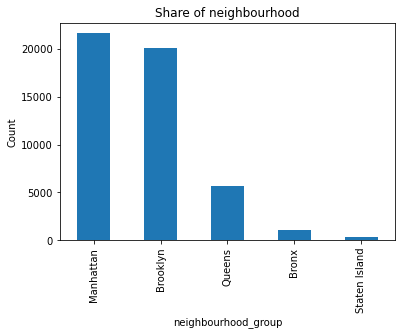

In [6]:
df.neighbourhood_group.value_counts().plot(kind="bar")
plt.title("Share of neighbourhood")
plt.xlabel("neighbourhood_group")
plt.ylabel("Count")

<AxesSubplot:ylabel='neighbourhood_group'>

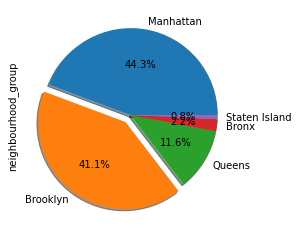

In [7]:
df['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.1,0,0,0],autopct='%1.1f%%',shadow=True)

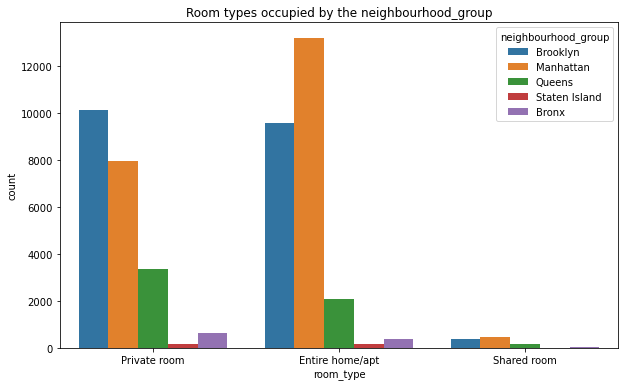

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

In [11]:
df1=df.sort_values(by=['number_of_reviews'],ascending=False).head(100)
df1.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173


In [12]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE

import warnings 
warnings.filterwarnings('ignore')

In [13]:
df["name"] = pd.get_dummies(df['name'])
df["neighbourhood_group"]= pd.get_dummies(df['neighbourhood_group'])
df["neighbourhood"]= pd.get_dummies(df['neighbourhood'])
df["room_type"]= pd.get_dummies(df['room_type'])

In [14]:
df

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2787,0,0,40.64749,-73.97237,0,149,1,9,0.21,6,365
1,0,2845,0,0,40.75362,-73.98377,1,225,1,45,0.38,2,355
2,0,4632,0,0,40.80902,-73.94190,0,150,3,0,0.00,1,365
3,0,4869,0,0,40.68514,-73.95976,1,89,1,270,4.64,1,194
4,0,7192,0,0,40.79851,-73.94399,1,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,0,8232441,0,0,40.67853,-73.94995,0,70,2,0,0.00,2,9
48891,0,6570630,0,0,40.70184,-73.93317,0,40,4,0,0.00,2,36
48892,0,23492952,0,0,40.81475,-73.94867,1,115,10,0,0.00,1,27
48893,0,30985759,0,0,40.75751,-73.99112,0,55,1,0,0.00,6,2


In [22]:
X=df.drop(['price','latitude','longitude'],axis=1)
y=df['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.10751369682740974